# ML CLASSIFICATION - {"RED WINE QUALITY" DATASET}

## 1. Importing Modules and Setting Configurations

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import StratifiedKFold, cross_val_score

from pickle import dump, load

import warnings
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

In [2]:
# PD Options

pd.set_option('display.min_rows', 5)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 4)

In [3]:
# SB Options

sb.set_theme(context='notebook', style='whitegrid', palette='pastel', font='times new roman', font_scale=1.25)

## 2. Importing Dataset

### 2.1 Train Dataset

In [4]:
tr = pd.read_pickle('wine_quality_train_pp.pkl')


print(f'Shape of the train dataset : {tr.shape}')
tr.head(5)

Shape of the train dataset : (1159, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1116,6.5,0.510,0.15,3.0,0.064,12.0,27.0,0.9929,3.33,0.59,12.8,6
103,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.67,9.7,6
447,10.5,0.510,0.64,2.4,0.107,6.0,15.0,0.9973,3.09,0.66,11.8,7
1146,7.6,0.645,0.03,1.9,0.086,14.0,57.0,0.9969,3.37,0.46,10.3,5
305,10.7,0.670,0.22,2.7,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,6


In [5]:
Xtr = tr.drop(columns='quality')
ytr = tr['quality']

In [6]:
ytr = ytr.apply(lambda x: 1 if x>=6 else 0)
ytr = ytr.astype('category')

### 2.2 Validation Dataset

In [7]:
val = pd.read_pickle('wine_quality_valid_pp.pkl')

print(f'Shape of the train dataset : {val.shape}')
val.head(5)

Shape of the train dataset : (100, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
905,10.2,0.29,0.65,2.4,0.075,6.0,17.0,0.9957,3.22,0.63,11.8,6
1336,5.6,0.31,0.78,13.9,0.074,23.0,92.0,0.9968,3.39,0.48,10.5,6
69,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5
933,8.6,0.52,0.38,1.5,0.096,5.0,18.0,0.9967,3.20,0.52,9.4,5
310,6.7,0.75,0.01,2.4,0.078,17.0,32.0,0.9955,3.55,0.61,12.8,6


In [8]:
Xval = val.drop(columns='quality')
yval = val['quality']

In [9]:
yval = yval.apply(lambda x: 1 if x>=6 else 0)
yval = yval.astype('category')

## 3. Pipeline Creation for Model Building

In [10]:
mdl = LogisticRegression(random_state=46)
#mdl = RandomForestClassifier(random_state=46)

In [11]:
pipe = Pipeline([
    ('mdl',mdl)
    ])

## 4. Model Training

In [12]:
pipe.fit(Xtr,ytr)

Pipeline(steps=[('mdl', LogisticRegression(random_state=46))])

## 5. Model Evaluation On Train and Test Data

In [13]:
yhat_tr = pipe.predict(Xtr)
yhat_val = pipe.predict(Xval)

print(f'Train Dataset Accuracy : {round(accuracy_score(ytr,yhat_tr)*100,4)} % \n')
print(f'Validation Dataset Accuracy : {round(accuracy_score(yval,yhat_val)*100,4)} %')

Train Dataset Accuracy : 75.0647 % 

Validation Dataset Accuracy : 70.0 %


In [14]:
print(classification_report(yval,yhat_val))

              precision    recall  f1-score   support

           0       0.70      0.65      0.67        48
           1       0.70      0.75      0.72        52

    accuracy                           0.70       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.70      0.70      0.70       100



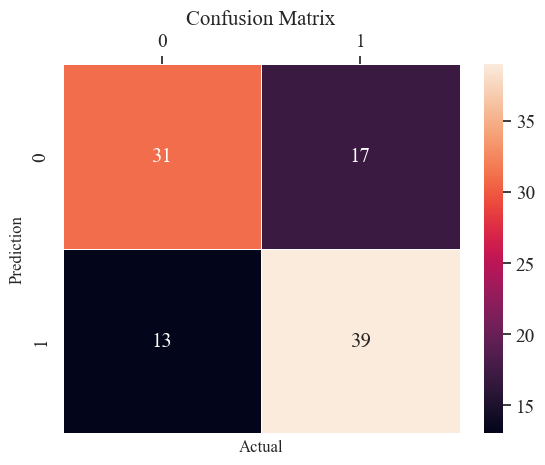

In [15]:
labels = yval.unique().tolist()
labels.sort()
#print(labels)

cm = confusion_matrix(yval,yhat_val)
#print(cm)

ax = sb.heatmap(cm, annot=True, fmt='g', xticklabels=labels, yticklabels=labels, linewidth=0.5)
ax.xaxis.tick_top()

plt.ylabel('Prediction',fontsize=12)
plt.xlabel('Actual',fontsize=12)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

## 6. Cross Validation

In [16]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=46)
cv_score = cross_val_score(pipe, Xtr, ytr, cv=kfold, scoring='accuracy').mean()
print(f'Cross Validation Score is : {round(cv_score*100,4)} %')

Cross Validation Score is : 74.9843 %


## 7. Model Save/Export

In [17]:
dump(pipe, open('wine_quality_mdl_simple.pkl','wb'))
print('Model Object Saved Successfully \n')

dump(Xtr, open('wine_quality_X_simple.pkl','wb'))
print('"Xtr" Features Saved Successfully')

Model Object Saved Successfully 

"Xtr" Features Saved Successfully


## 8. Simple Prediction System

### 8.1 Combining Xval and yval

In [18]:
samp = Xval.sample(10).index.values.tolist()
samp

[1249, 1243, 1215, 1224, 200, 1355, 445, 787, 361, 1336]

In [19]:
val_df = pd.concat([Xval.loc[samp],yval.loc[samp]],axis=1)
val_df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1249,6.1,0.600,0.08,1.80,0.071,14.0,45.0,0.9934,3.38,0.54,11.0,0
1243,7.3,0.480,0.32,2.10,0.062,31.0,54.0,0.9973,3.30,0.65,10.0,1
1215,6.1,0.400,0.16,1.80,0.069,11.0,25.0,0.9955,3.42,0.74,10.1,1
1224,6.9,0.580,0.20,1.75,0.058,8.0,22.0,0.9932,3.38,0.49,11.7,0
200,8.4,0.635,0.36,2.00,0.089,15.0,55.0,0.9974,3.31,0.57,10.4,0
1355,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.9949,3.45,0.58,10.5,0
445,12.4,0.420,0.49,4.60,0.073,19.0,43.0,0.9978,3.02,0.61,9.5,0
787,8.4,0.360,0.32,2.20,0.081,32.0,79.0,0.9964,3.30,0.72,11.0,1
361,9.9,0.400,0.53,6.70,0.097,6.0,19.0,0.9986,3.27,0.82,11.7,1
1336,5.6,0.310,0.78,13.90,0.074,23.0,92.0,0.9968,3.39,0.48,10.5,1


### 8.2 Prediction on Validation Data

In [20]:
#inp_data = (13.7,0.415,0.68,2.9,0.085,17.0,43.0,1.0014,3.06,0.80,10.0)
#inp_data = np.array(inp_data).reshape(1,-1)

idx = val_df.sample().index.values
inp_data = Xval.loc[idx].values  

print(f'Test Data with Index : {idx[0]} is Selected for Prediction: \n')

for fea_name, fea_val in zip(Xval.columns.tolist(), inp_data[0]):
    print(f'"{fea_name}" ---:--- {fea_val}')

Test Data with Index : 787 is Selected for Prediction: 

"fixed acidity" ---:--- 8.4
"volatile acidity" ---:--- 0.36
"citric acid" ---:--- 0.32
"residual sugar" ---:--- 2.2
"chlorides" ---:--- 0.081
"free sulfur dioxide" ---:--- 32.0
"total sulfur dioxide" ---:--- 79.0
"density" ---:--- 0.9964
"pH" ---:--- 3.3
"sulphates" ---:--- 0.72
"alcohol" ---:--- 11.0


In [21]:
print(f'------------- Prediction for Validation Data with Index : {idx[0]} --------------------\n')

print(f'Actual Wine Quality for the Selected Data : {yval[idx[0]]} \n')

pipe = load(open('wine_quality_mdl_simple.pkl','rb'))
pred = pipe.predict(inp_data)

if (pred[0] == 1):
    print(f'Predicted Wine Quality : {pred[0]} (High Quality Wine)')
else:
    print(f'Predicted Wine Quality : {pred[0]} (Low Quality Wine)')

------------- Prediction for Validation Data with Index : 787 --------------------

Actual Wine Quality for the Selected Data : 1 

Predicted Wine Quality : 1 (High Quality Wine)
